In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [24]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Embarked_Group    0
Age_Group         0
Fare_Range        0
dtype: int64

In [7]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [22]:
df.count()

PassengerId       87
Survived          87
Pclass            87
Name              87
Sex               87
Age               87
SibSp             87
Parch             87
Ticket            87
Fare              87
Cabin             87
Embarked          87
Embarked_Group    87
Age_Group         87
Fare_Range        87
dtype: int64

In [25]:
datadict = pd.DataFrame(df.dtypes)
datadict['NUnique']= df.nunique()
datadict['Count']= df.count()
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,NUnique,Count
PassengerId,int64,87,87
Survived,int64,2,87
Pclass,int64,3,87
Name,object,87,87
Sex,object,2,87
Age,float64,46,87
SibSp,int64,4,87
Parch,int64,5,87
Ticket,object,66,87
Fare,float64,58,87


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,0.505747,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.502865,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,1.000000,3.000000,76.000000,3.000000,4.000000,512.329200


In [27]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked,Embarked_Group
count,87,87,87,87,87,87
unique,87,2,66,72,3,3
top,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,113503,B57 B59 B63 B66,C,Other
freq,1,44,4,3,47,47


In [28]:
df.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,0.505747,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.502865,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,1.000000,3.000000,76.000000,3.000000,4.000000,512.329200


In [31]:
df.Survived.value_counts()

Survived
1    44
0    43
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

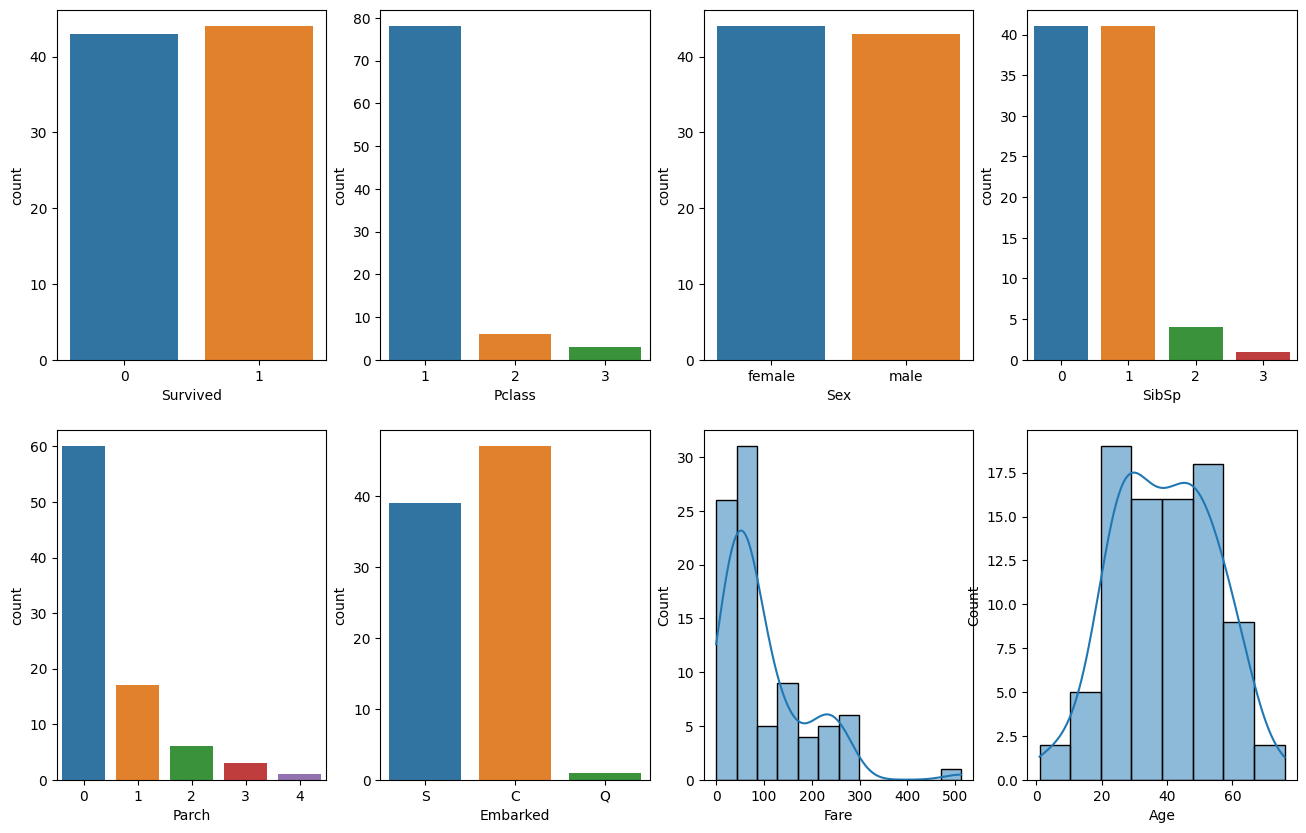

In [41]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(data=df, x='Survived', ax=axes[0, 0])
sns.countplot(data=df, x='Pclass', ax=axes[0, 1])
sns.countplot(data=df, x='Sex', ax=axes[0, 2])
sns.countplot(data=df, x='SibSp', ax=axes[0, 3])
sns.countplot(data=df, x='Parch', ax=axes[1, 0])
sns.countplot(data=df, x='Embarked', ax=axes[1, 1])
sns.histplot(data=df, x='Fare', kde=True, ax=axes[1, 2])
sns.histplot(data=df['Age'].dropna(), kde=True, ax=axes[1, 3])

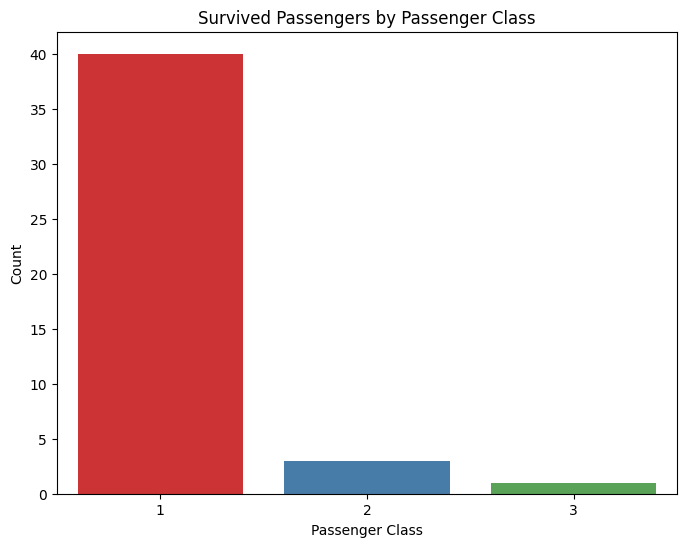

In [32]:
survived_passengers = df[df['Survived'] == 1]

plt.figure(figsize=(8, 6))
sns.countplot(data=survived_passengers, x='Pclass', palette='Set1')
plt.title('Survived Passengers by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


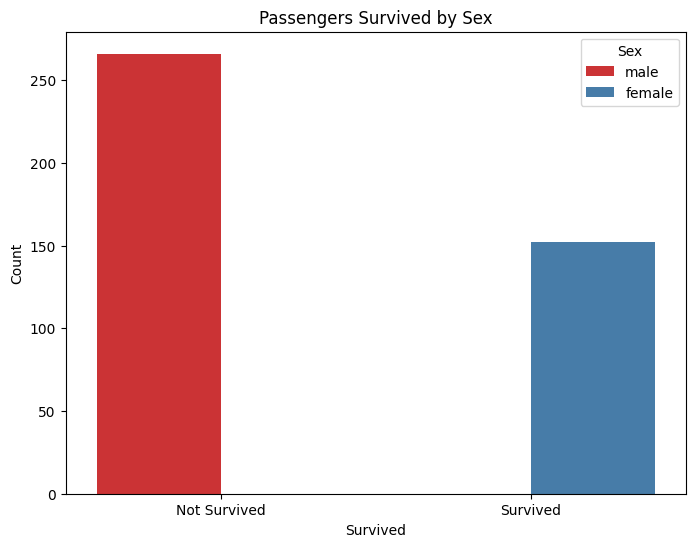

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Sex', palette='Set1')
plt.title('Passengers Survived by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])  # Replace labels for clarity
plt.legend(title='Sex')
plt.show()


In [33]:
female_survived_count = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]

print("No. of female passengers who survived:", female_survived_count)

No. of female passengers who survived: 44


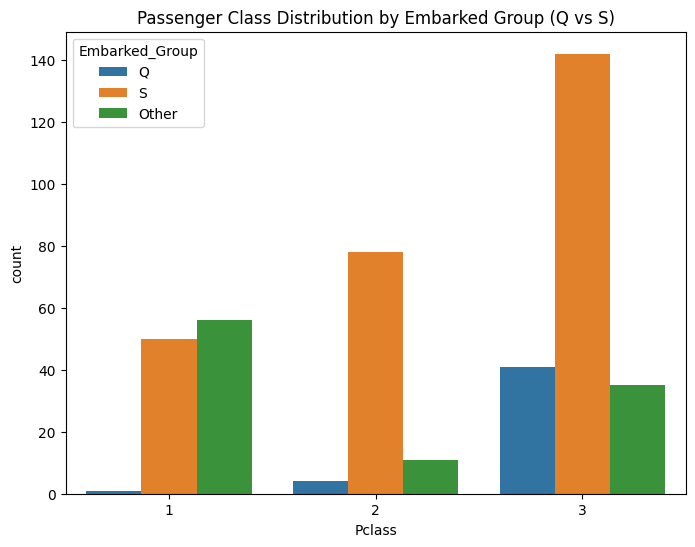

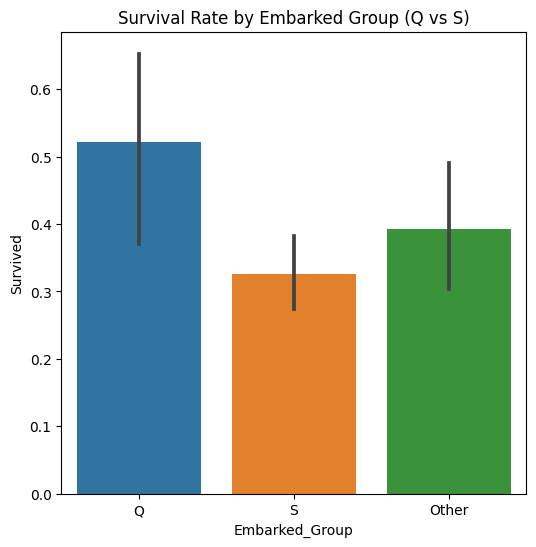

In [12]:
df['Embarked_Group'] = df['Embarked'].apply(lambda x: 'Q' if x == 'Q' else 'S' if x == 'S' else 'Other')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Embarked_Group')
plt.title('Passenger Class Distribution by Embarked Group (Q vs S)')
plt.show()

plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Embarked_Group', y='Survived')
plt.title('Survival Rate by Embarked Group (Q vs S)')
plt.show()


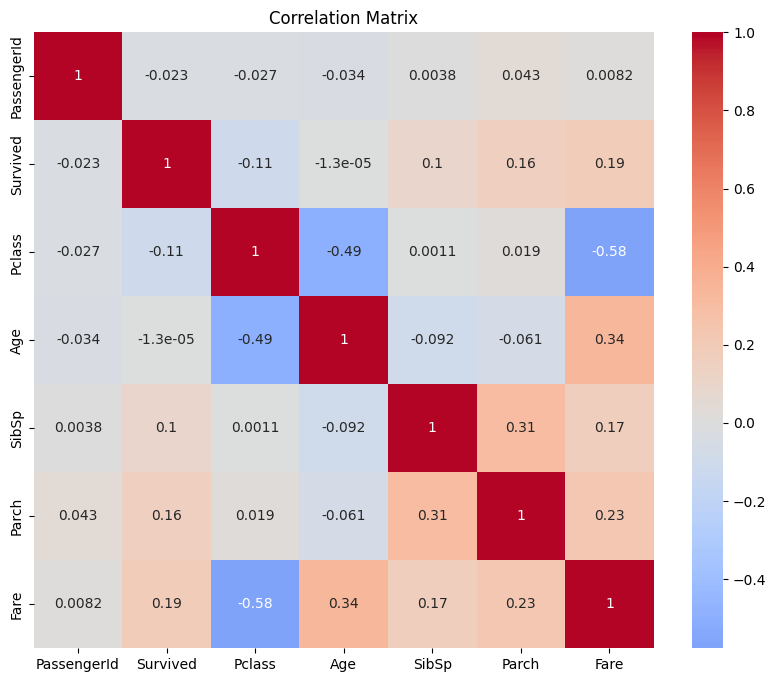

In [13]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


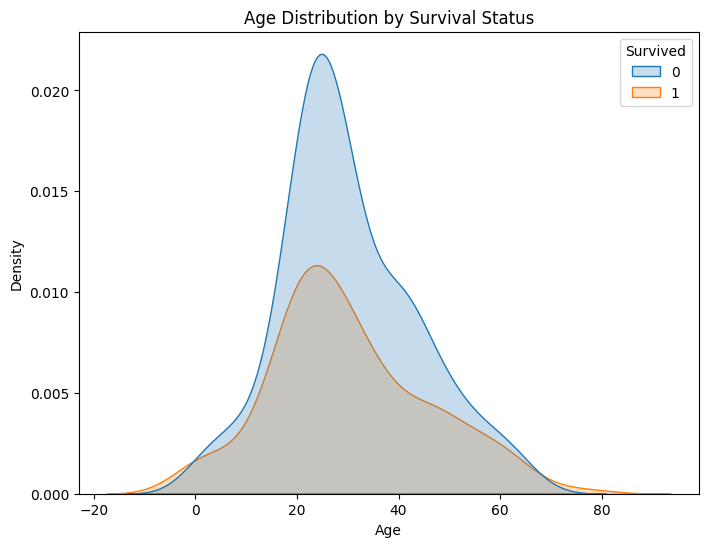

In [14]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Age Distribution by Survival Status')
plt.show()


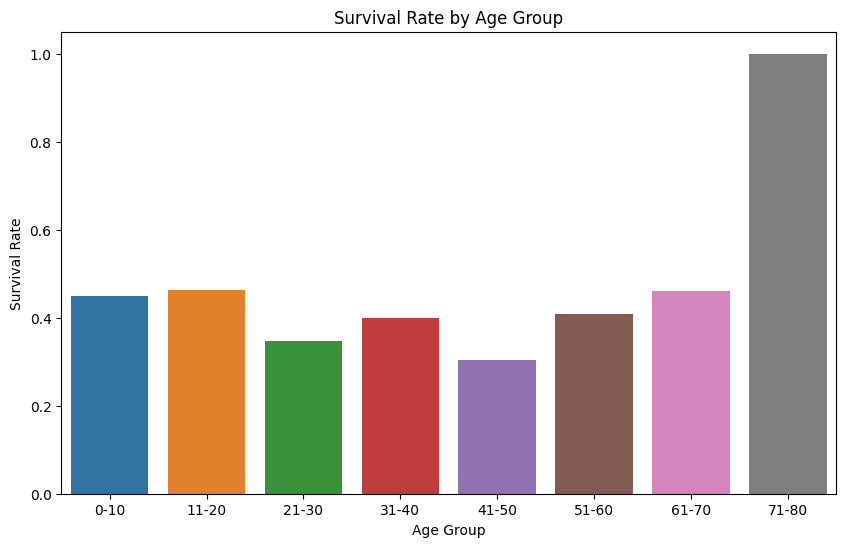

In [15]:
age = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['Age_Group'] = pd.cut(df['Age'], bins=age, labels=age_labels, right=False)
age_survival = df.groupby('Age_Group')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=age_survival, x='Age_Group', y='Survived')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


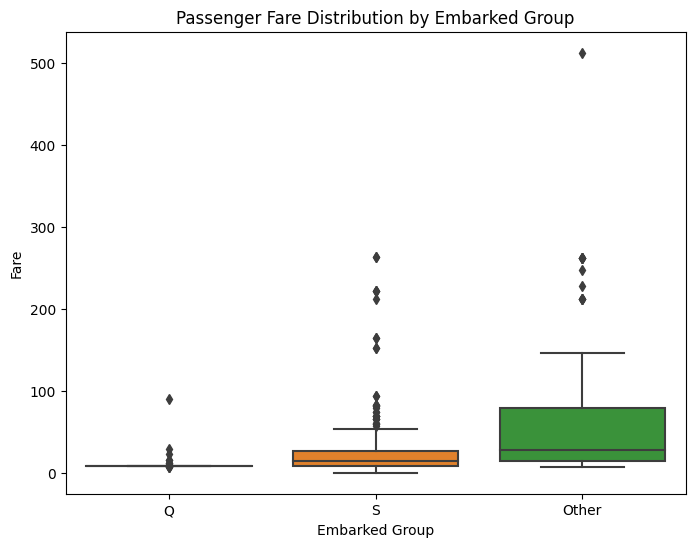

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Embarked_Group', y='Fare')
plt.title('Passenger Fare Distribution by Embarked Group')
plt.xlabel('Embarked Group')
plt.ylabel('Fare')
plt.show()


c:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


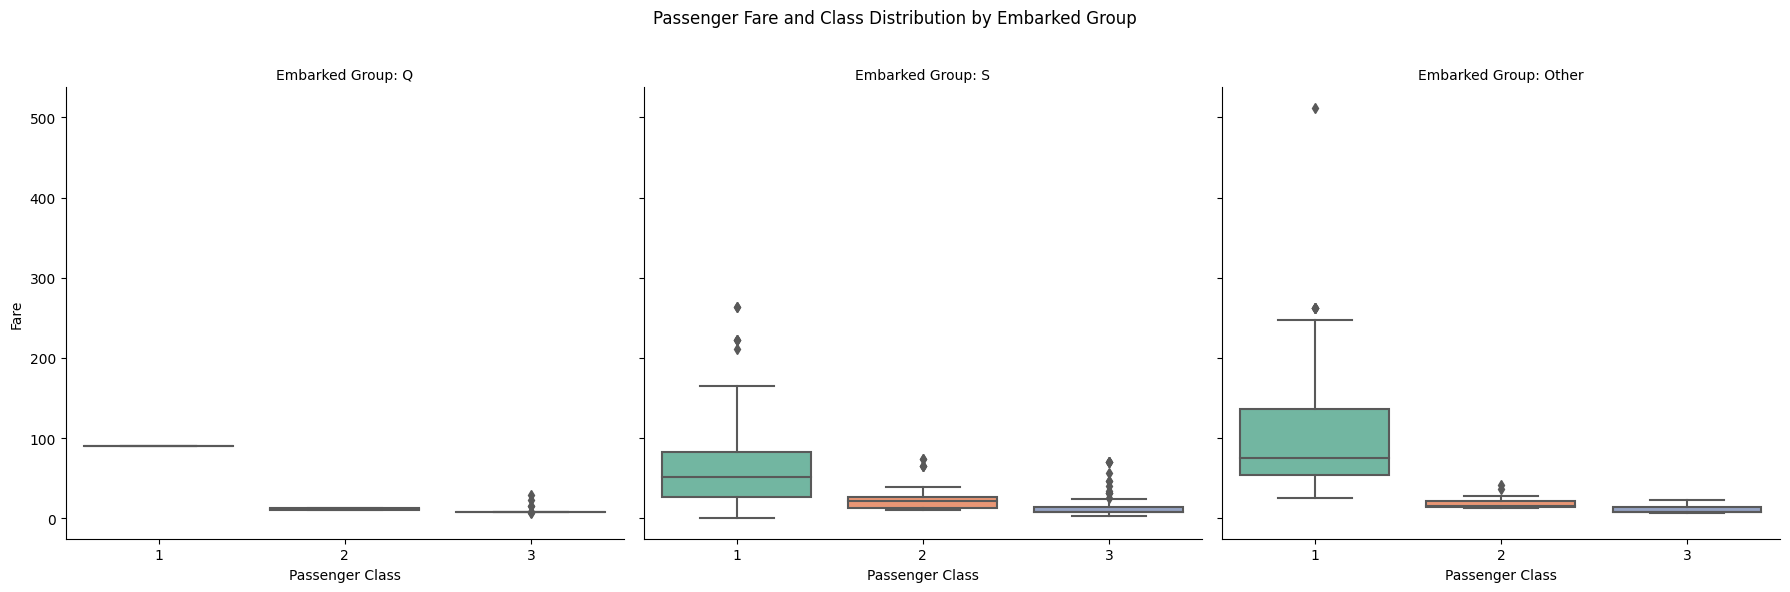

In [17]:
g = sns.FacetGrid(df, col='Embarked_Group', height=6)
g.map(sns.boxplot, 'Pclass', 'Fare', palette='Set2')
g.set_axis_labels('Passenger Class', 'Fare')
g.set_titles('Embarked Group: {col_name}')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Passenger Fare and Class Distribution by Embarked Group')
plt.show()


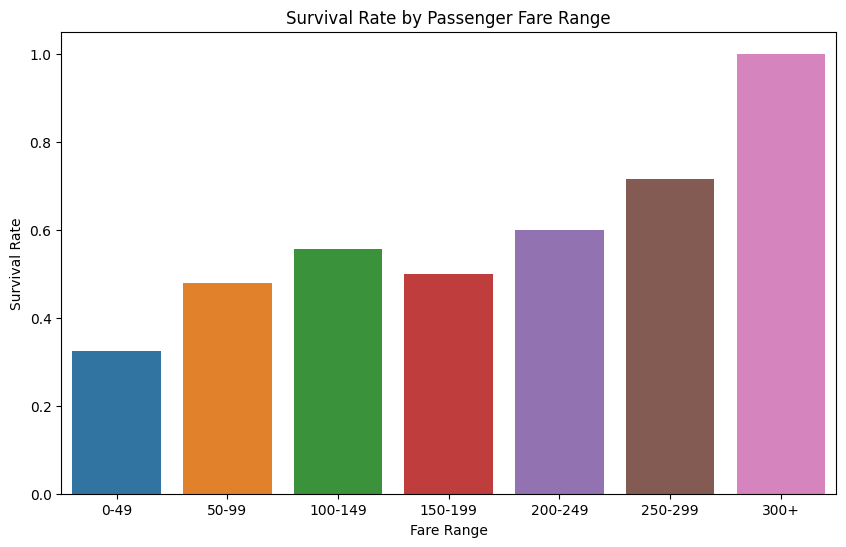

In [18]:
fare = [0, 50, 100, 150, 200, 250, 300, 1000]
fare_labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300+']
df['Fare_Range'] = pd.cut(df['Fare'], bins=fare, labels=fare_labels, right=False)
fare_survival = df.groupby('Fare_Range')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=fare_survival, x='Fare_Range', y='Survived')
plt.title('Survival Rate by Passenger Fare Range')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.show()


In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [43]:
X_Age = df[['Age']].values
y = df['Survived'].values
lr.fit(X_Age,y)
y_predict = lr.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()

0.5057471264367817

In [44]:
X_Fare = df[['Fare']].values
y = df['Survived'].values
lr.fit(X_Fare,y)
y_predict = lr.predict(X_Fare)
y_predict[:10]
(y == y_predict).mean()

0.5287356321839081

In [45]:
X_sex = pd.get_dummies(df['Sex']).values
y = df['Survived'].values
lr.fit(X_sex, y)
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

1.0

In [46]:
X_pclass = pd.get_dummies(df['Pclass']).values
y = df['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.5172413793103449